# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [116]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [117]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [118]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [119]:
# data types
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [120]:
# Categorical columns
websites.select_dtypes(exclude='number')

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
0,M0_109,iso-8859-1,nginx,None,None,10/10/2015 18:21,None
1,B0_2314,UTF-8,Apache/2.4.10,None,None,None,None
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None
3,B0_113,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45
4,B0_403,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00
...,...,...,...,...,...,...,...
1776,M4_48,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00
1777,M4_41,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00
1778,B0_162,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00
1779,B0_1152,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00


In [121]:
# Numeric columns
websites.select_dtypes(include='number')

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0,0.0,0


In [122]:
# we see the URL containf B as benign adn M as malicious 
# we observe that the Type tells us if the website is benign=0 or malicious=1 
# we will use Type as our target
websites[["URL","Type"]]

,URL,Type
0,M0_109,1
1,B0_2314,0
2,B0_911,0
3,B0_113,0
4,B0_403,0
...,...,...
1776,M4_48,1
1777,M4_41,1
1778,B0_162,0
1779,B0_1152,0


In [123]:
websites['Type'].value_counts()

0    1565
1     216
Name: Type, dtype: int64

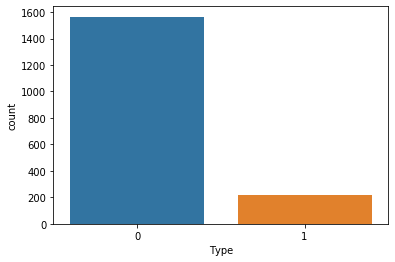

In [124]:
sns.countplot(websites.Type);

In [125]:
# nan values
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [126]:
# we could remove Nan values from column CONTENT_LENGTH &
# maybe check column SERVER & DNS_QUERY_TIMES if we can replace the Nan value as it is only 1

In [127]:
# Categorical Variable we could tranform to ordinal values is Type

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

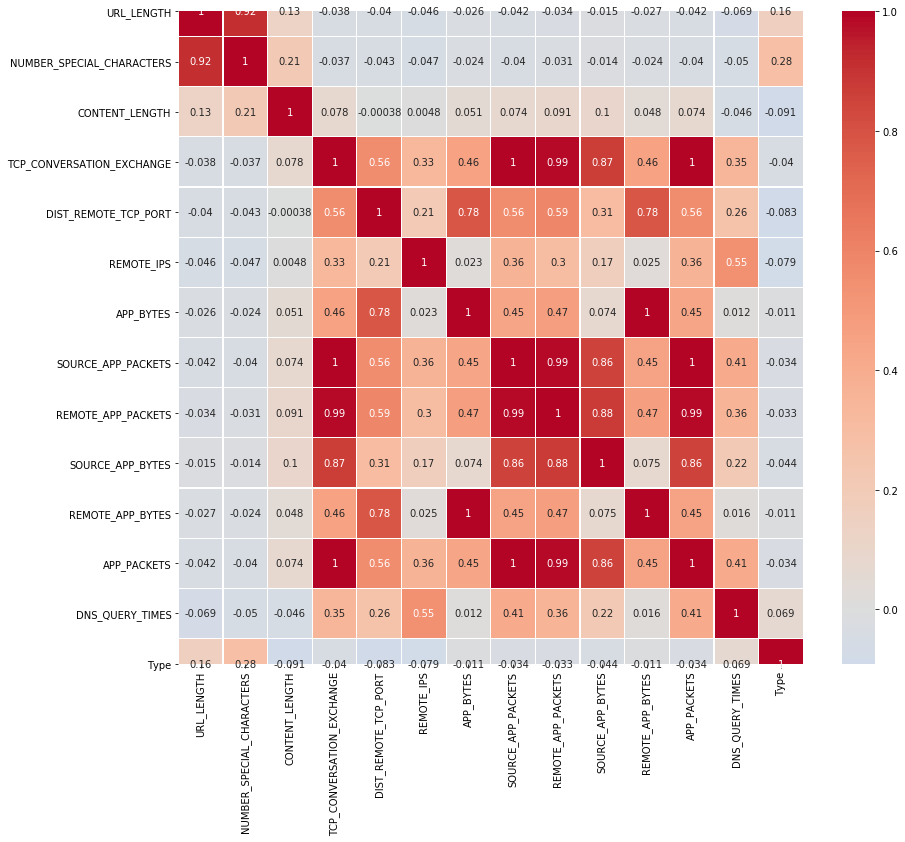

In [128]:
# Your code here

# correlation matrix
plt.figure(figsize = (14,12))
sns.heatmap(websites.corr(), linewidths =.2 ,cmap = 'coolwarm',center = 0,annot = True)
plt.yticks(rotation = 0);

In [129]:
# Your comment here
"""
Dark bred is the colour that reflects the variables with more correlation
variables with more correlation are lots of them as: TCP_CONVERSATION_EXCHANGE, APP_PACKETS,REMOTE_APP_BYTES, APP_BYTES, SOURCE_APP_BYTES 
among other that folow with with a bit less than 1
"""

'\nDark bred is the colour that reflects the variables with more correlation\nvariables with more correlation are lots of them as: TCP_CONVERSATION_EXCHANGE, APP_PACKETS,REMOTE_APP_BYTES, APP_BYTES, SOURCE_APP_BYTES \namong other that folow with with a bit less than 1\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [130]:
# Your comment here

"""
We could find the VIFS and remove them with a function. 
But for this lab we will go 1 by 1 to see in a graph how the correlation changes betwee the variables
We will remove: SOURCE_APP_PACKETS, REMOTE_APP_BYTES, APP_PACKETS, APP_BYTES, REMOTE_APP_PACKETS columns

""" 

'\nWe could find the VIFS and remove them with a function. \nBut for this lab we will go 1 by 1 to see in a graph how the correlation changes betwee the variables\nWe will remove: SOURCE_APP_PACKETS, REMOTE_APP_BYTES, APP_PACKETS, APP_BYTES, REMOTE_APP_PACKETS columns\n\n'

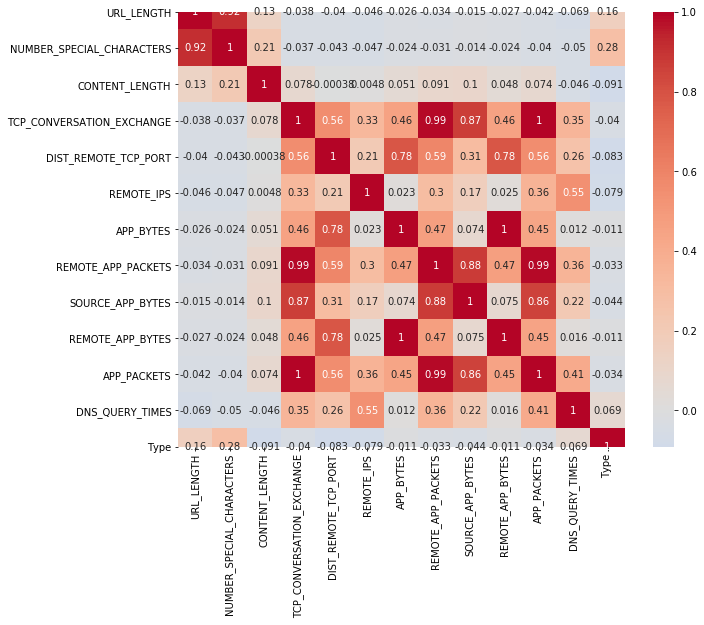

In [131]:
# remove column SOURCE_APP_PACKETS
websites.drop('SOURCE_APP_PACKETS', axis=1, inplace=True)

plt.figure(figsize = (10,8))
sns.heatmap(websites.corr(), annot=True, cmap='coolwarm',center = 0);
plt.yticks(rotation = 0);

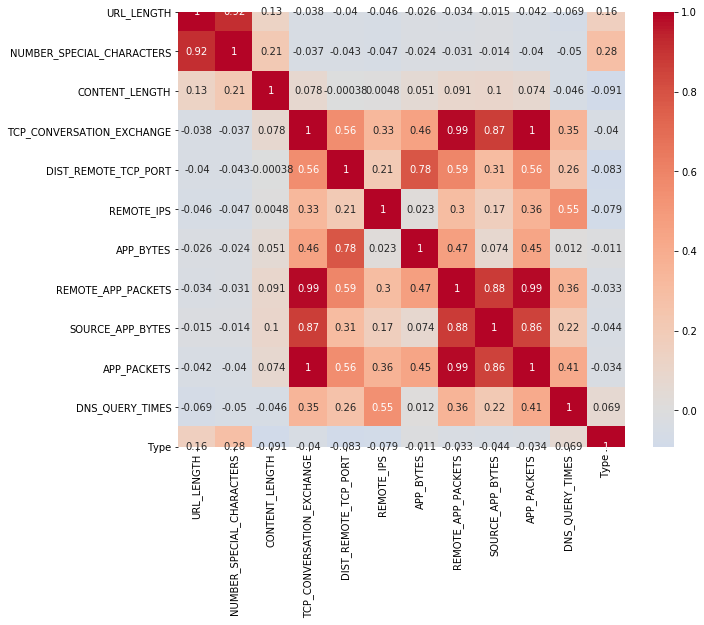

In [132]:
# remove column REMOTE_APP_BYTES
websites.drop('REMOTE_APP_BYTES', axis=1, inplace=True)

plt.figure(figsize = (10,8))
sns.heatmap(websites.corr(), annot=True, cmap='coolwarm',center = 0);
plt.yticks(rotation = 0);

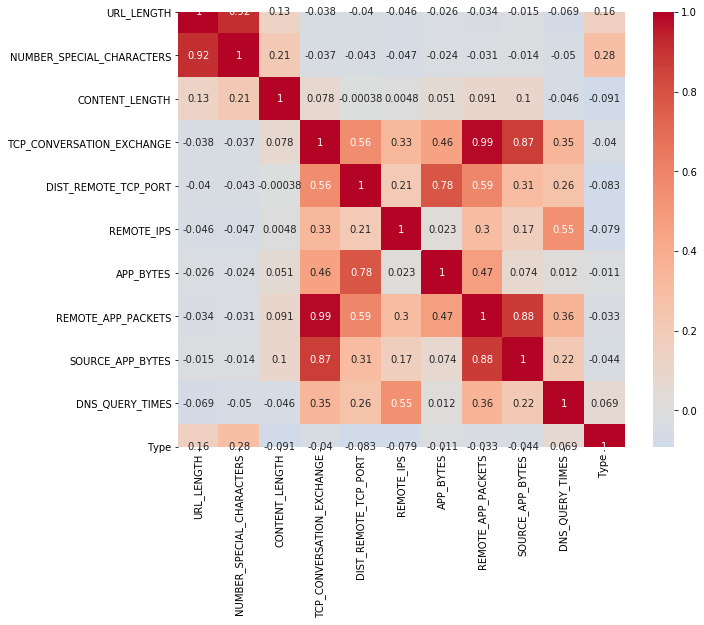

In [133]:
# remove column APP_PACKETS
websites.drop('APP_PACKETS', axis=1, inplace=True)

plt.figure(figsize = (10,8))
sns.heatmap(websites.corr(), annot=True, cmap='coolwarm',center = 0);
plt.yticks(rotation = 0);

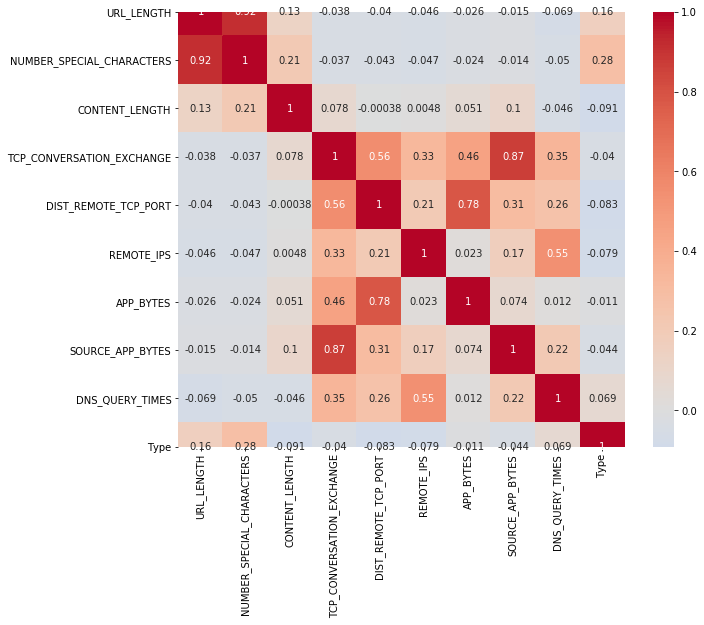

In [134]:
# remove column REMOTE_APP_PACKETS
websites.drop('REMOTE_APP_PACKETS', axis=1, inplace=True)

plt.figure(figsize = (10,8))
sns.heatmap(websites.corr(), annot=True, cmap='coolwarm',center = 0)
plt.yticks(rotation = 0);

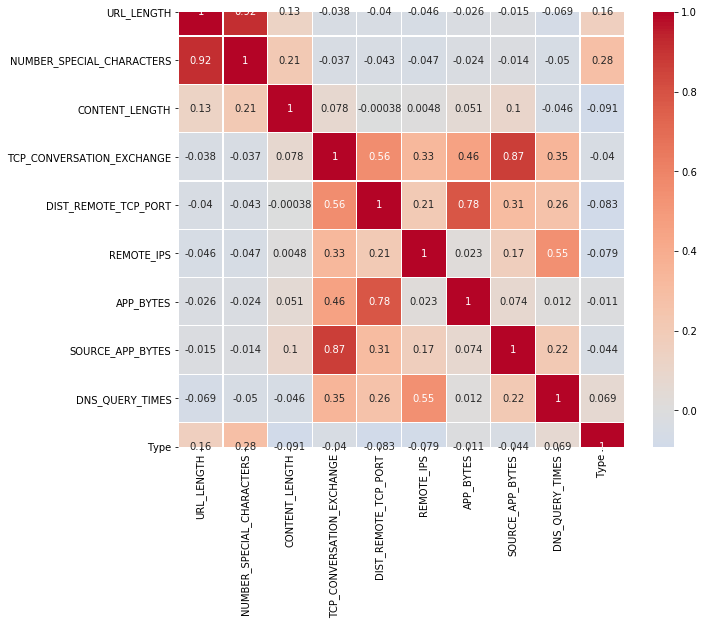

In [135]:
# Print heatmap again
plt.figure(figsize = (10,8))
sns.heatmap(websites.corr(), linewidths =.2 ,cmap = 'coolwarm',center = 0, annot = True)
plt.yticks(rotation = 0);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [136]:
# Your code here

# Sum of Nan values
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [137]:
# Your code here

# we remove Nan values
# in this case we remove column CONTENT_LENGTH , we have no interest in this one
websites.drop(["CONTENT_LENGTH"], axis=1, inplace=True) 

In [138]:
# in this case we could also remove column SERVER & DNS_QUERY_TIMES as countain 1 Nan 
# But becuase it only contain 1 Nan we'll remove the specific row

# check row column SERVER
websites[websites["SERVER"].isnull()==True]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
1306,B0_2134,66,11,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,15,2,4,1026,246,0.0,0


In [139]:
# check row column DNS_QUERY_TIMES
websites[websites["DNS_QUERY_TIMES"].isnull()==True]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
1659,B0_772,101,15,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,4,2,2,276,416,NaN,0


In [140]:
# delete rows
websites.drop(index=[1306, 1659], inplace=True)

In [141]:
# Your comment here
"""
we remove column CONTENT_LENGTH , we had too many values
We also remove rows from columns SERVER & DNS_QUERY_TIMES as countain only 1 Nan  each and didn't want to remove the whole column

"""

"\nwe remove column CONTENT_LENGTH , we had too many values\nWe also remove rows from columns SERVER & DNS_QUERY_TIMES as countain only 1 Nan  each and didn't want to remove the whole column\n\n"

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [142]:
# Examine missing values in each column
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [143]:
# Your code here
websites["WHOIS_COUNTRY"].value_counts()

US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
IN                  10
CN                  10
CZ                   9
FR                   9
CH                   6
NL                   6
[u'GB'; u'UK']       5
KR                   5
ru                   4
PH                   4
BS                   4
AT                   4
KY                   3
SE                   3
HK                   3
DE                   3
SC                   3
BE                   3
us                   3
TR                   3
NO                   2
IL                   2
RU                   2
BR                   2
UY                   2
SI                   2
Cyprus               2
UA                   2
KG                   2
LU                   1
UG                   1
AE                   1
TH                   1
BY                   1
IT         

In [144]:
websites.WHOIS_COUNTRY.loc[(websites.WHOIS_COUNTRY == 'Cyprus')] = 'CY'
websites.WHOIS_COUNTRY.loc[(websites.WHOIS_COUNTRY == 'us')] = 'US'
websites.WHOIS_COUNTRY.loc[(websites.WHOIS_COUNTRY == 'se')] = 'SE'
websites.WHOIS_COUNTRY.loc[(websites.WHOIS_COUNTRY == '''[u'GB'; u'UK']''')] = 'UK'
websites.WHOIS_COUNTRY.loc[(websites.WHOIS_COUNTRY == 'GB')] = 'UK'
websites.WHOIS_COUNTRY.loc[(websites.WHOIS_COUNTRY == 'United Kingdom')] = 'UK'

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

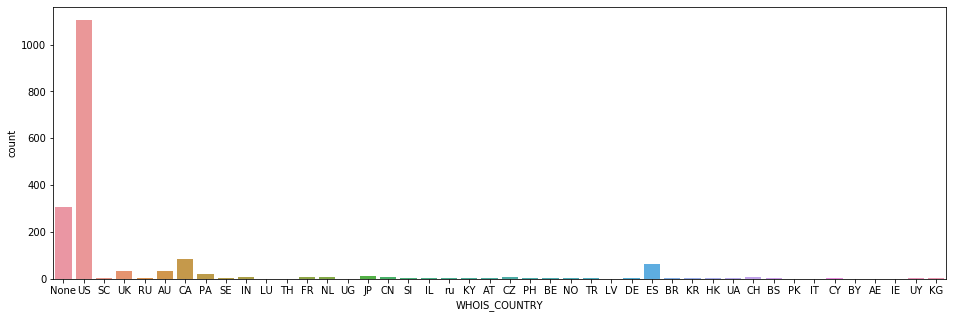

In [147]:
# Your code here

plt.figure(figsize = (16,5))

sns.countplot(x="WHOIS_COUNTRY", data=websites)

plt.yticks(rotation = 0);

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [148]:
# Your code here

# keep the top 10 values of the column
country_top10= websites["WHOIS_COUNTRY"].value_counts().head(10)

In [149]:
# re-label other columns with OTHER
def rename(country):
    if country not in country_top10:
        country = 'OTHER'
    return country

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(rename)

In [150]:
# check new top 10
websites['WHOIS_COUNTRY'].value_counts()

US       1105
None      306
OTHER     100
CA         83
ES         63
AU         35
UK         35
PA         21
JP         11
CN         10
IN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [151]:
# Your code here
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True) 

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [152]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [153]:
# Your code here
websites.drop(["URL"], axis=1, inplace=True) 

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [154]:
# Your code here
websites["CHARSET"].value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
windows-1252      1
ISO-8859          1
Name: CHARSET, dtype: int64

In [155]:
# We make sure upper & lower charcter done interfere
websites['CHARSET'].loc[websites.CHARSET == 'utf-8'] = 'UTF-8'
websites['CHARSET'].loc[websites.CHARSET == 'iso-8859-1'] = 'ISO-8859-1'
websites['CHARSET'].loc[websites.CHARSET == 'ISO-8859'] = 'ISO-8859-1'

In [156]:
websites["CHARSET"].value_counts()

UTF-8           1053
ISO-8859-1       562
us-ascii         155
None               7
windows-1251       1
windows-1252       1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [157]:
# Your code here
websites["SERVER"].value_counts()

Apache                                                                             385
nginx                                                                              211
None                                                                               175
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
                                                                                  ... 
mw2171.codfw.wmnet                                                                   1
Apache/2.2.20 (Unix)                                                                 1
Play                                                                                 1
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips DAV/2 mod_bwlimited/1.4      1
mw2104.codfw.wmnet                                                                   1
Name: SERVER, Length: 239, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [158]:
# Your comment here
"""
I would reduce the names to general servers as Apache, etc.
"""

'\nI would reduce the names to general servers as Apache, etc.\n'

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [159]:
# Your code here

# re-label SERVER columns with Microsoft, Apache, nginx, and Other

server_names= ["Microsoft", "Apache", "nginx"]

def rename_server(server):
    for name in server_names:
        if name in server:
            return name
    return 'Other'

websites['SERVER'] = websites['SERVER'].apply(rename_server)

In [160]:
# Count `SERVER` value counts here
websites["SERVER"].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [161]:
# Your code here
website_dummy= pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [162]:
# Your code here
website_dummy.dtypes


URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_None                   uint8
CHARSET_UTF-8                  uint8
CHARSET_us-ascii               uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_IN               uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_None             uint8
WHOIS_COUNTRY_OTHER            uint8
WHOIS_COUNTRY_PA               uint8
WHOIS_COUNTRY_UK               uint8
WHOIS_COUNTRY_US               uint8
d

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [163]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict

In [172]:
# Your code here:

# define X & Y
X = website_dummy.drop(axis=1, labels=["Type"])
y= websites["Type"].values

# define train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [173]:
# Your code here:
model= LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [174]:
# Your code here:

#fit
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [175]:
model.score(X_train, y_train)

0.9318341531974701

In [176]:
model.score(X_test, y_test)

0.9073033707865169

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [178]:
# Your code here:

#predict
y_pred = model.predict(X_test)

# confusion matrix
print(confusion_matrix(y_pred, y_test))

[[300  22]
 [ 11  23]]


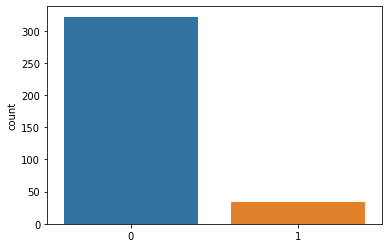

In [180]:
sns.countplot(y_pred);

In [179]:
# accuracy score
accuracy_score(y_pred, y_test)

0.9073033707865169

What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Your conclusions here:
"""
# We've an Accuaracy of 91%
# It is a very high accuracy score so it might be because the samples are very 
diferent from each other, 1 larger than the other, as we can see in the above plot.
"""


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [202]:
# Your code here:

#import
from sklearn.neighbors import KNeighborsClassifier 

# KNeighborsClassifier
model_knc_3 = KNeighborsClassifier(n_neighbors= 3).fit(X_train, y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [203]:
# Your code here:

#pred 
y_pred_knc_3 = model_knc_3.predict(X_test)

In [204]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_knc_3))

[[303   8]
 [ 20  25]]


In [205]:
# accuracy score
accuracy_score(y_test, y_pred_knc_3)

0.9213483146067416

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [206]:
# Your code here:
model_knc_5 = KNeighborsClassifier(n_neighbors= 5).fit(X_train, y_train)

In [207]:
# Your code here:

#pred 
y_pred_knc_5 = model_knc_5.predict(X_test)

In [208]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_knc_5))

[[305   6]
 [ 20  25]]


In [209]:
# accuracy score
accuracy_score(y_test, y_pred_knc_5)

0.9269662921348315

In [210]:
# graph matrix

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:

"""
K-Nearest Neighbors categorizes an input by using its k nearest neighbors.
The principle behind nearest neighbor methods is to find a predefined number of training samples 
closest in distance to the new point, and predict the label from these

In both cases, k=3 & k=5, we get very good results, k=5 is better but by a very very small difference.
"""


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [211]:
# Your code here

#import
from sklearn.preprocessing import RobustScaler

In [213]:
X_rscale_train = RobustScaler().fit_transform(X_train)
X_rscale_test = RobustScaler().fit_transform(X_test)

In [216]:
# model
model_rscale_log= LogisticRegression(max_iter=1000)

In [217]:
# fit
model_rscale_log.fit(X_scale_train, y_train)

LogisticRegression(max_iter=1000)

In [219]:
#pred 
y_pred_rscale = model_rscale_log.predict(X_test)

In [220]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_rscale))

[[310   1]
 [ 45   0]]


In [221]:
# accuracy score
accuracy_score(y_test, y_pred_rscale)

0.8707865168539326

In [ ]:
"""
If we set all features to weigh in equally with the RobustScaler, we see that our accuracy score is lower.
Might this be more realistic?
"""